#  Introduction to Deep Learning with Keras

**Demonstrates a basic neural network using Keras on the MNIST dataset, focusing on model implementation and evaluation.**

In [11]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [12]:
#Load the MNIST Dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


In [13]:
#Flatten Images for Dense Network
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)


In [14]:
#Build a Neural Network
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [15]:
#Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [16]:
#Train the Model
history = model.fit(x_train_flat, y_train, epochs=5, validation_split=0.1)


Epoch 1/5
1688/1688 [==============================] - 11s 5ms/step - loss: 0.2491 - accuracy: 0.9272 - val_loss: 0.1042 - val_accuracy: 0.9698
Epoch 2/5
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1027 - accuracy: 0.9679 - val_loss: 0.0872 - val_accuracy: 0.9748
Epoch 3/5
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0687 - accuracy: 0.9790 - val_loss: 0.0808 - val_accuracy: 0.9770
Epoch 4/5
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0535 - accuracy: 0.9829 - val_loss: 0.0863 - val_accuracy: 0.9755
Epoch 5/5
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0419 - accuracy: 0.9863 - val_loss: 0.0794 - val_accuracy: 0.9807


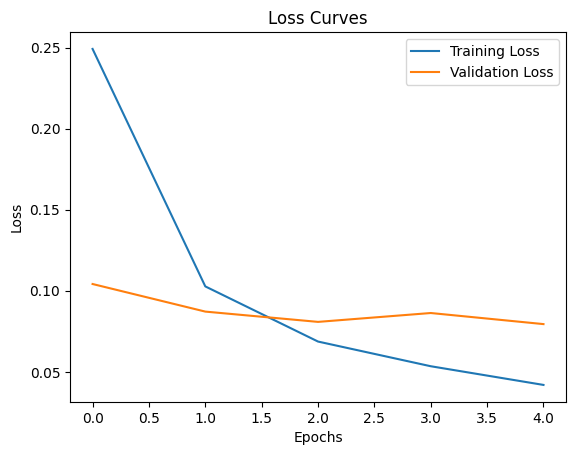

In [17]:
#Plot Loss Curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [18]:
#Evaluate on Test Data
test_loss, test_acc = model.evaluate(x_test_flat, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 [==============================] - 1s 3ms/step - loss: 0.0865 - accuracy: 0.9735
Test Accuracy: 0.9735


313/313 [==============================] - 1s 3ms/step


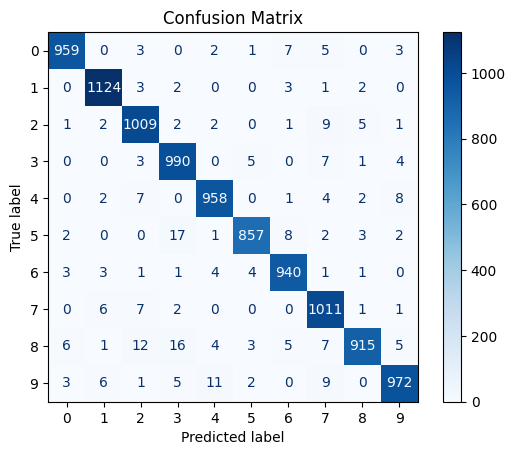

In [19]:
#Confusion Matrix
y_pred = model.predict(x_test_flat)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [10]:
# Reshape input for CNN
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

# CNN model
cnn_model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

cnn_history = cnn_model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)


Epoch 1/5
1688/1688 [==============================] - 43s 24ms/step - loss: 0.1447 - accuracy: 0.9562 - val_loss: 0.0568 - val_accuracy: 0.9825
Epoch 2/5
1688/1688 [==============================] - 40s 24ms/step - loss: 0.0477 - accuracy: 0.9861 - val_loss: 0.0440 - val_accuracy: 0.9862
Epoch 3/5
1688/1688 [==============================] - 42s 25ms/step - loss: 0.0347 - accuracy: 0.9890 - val_loss: 0.0439 - val_accuracy: 0.9868
Epoch 4/5
1688/1688 [==============================] - 43s 26ms/step - loss: 0.0244 - accuracy: 0.9921 - val_loss: 0.0347 - val_accuracy: 0.9908
Epoch 5/5
1688/1688 [==============================] - 44s 26ms/step - loss: 0.0182 - accuracy: 0.9941 - val_loss: 0.0303 - val_accuracy: 0.9917
